# 画线算法的实现

In [1]:
import buffer

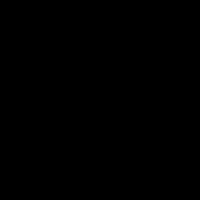

In [2]:
fb = buffer.FrameBuffer(200, 200)
fb.display()

## 最原始的画线方法
在两个点之间用固定的点数进行插值

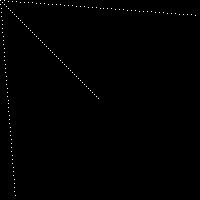

In [3]:
def draw_line1(start, end, frame_buffer):
    t = 0
    x0, y0 = start
    x1, y1 = end
    if(x0 > x1):
        return draw_line1(end, start, frame_buffer)
    while(t < 1):
        x = x0 + (x1 - x0) * t
        y = y0 + (y1 - y0) * t
        frame_buffer.draw_point((x, y))
        t += 0.02

fb.fill((0, 0, 0))
draw_line1((0, 0), (100, 100), fb)
draw_line1((0, 0), (199, 15), fb)
draw_line1((0, 0), (15, 199), fb)
fb.display()
    

- 可以看到这样做的话对于短的线段我们取得了较好的效果，但是对于长的线段，我们并不能取得很好的效果，主要是我们这样的做法相当于把线段分成了固定数量的子线段，每个线段用点来代替，对于短线段来说，每个子线段长度小，用点代替取得的效果还不错，但是对长线段来说，子线段长度很长，所以用来代替的效果就很差。
- 那么我们可以想到，可以增加点数来提高精确性，这样确实可以，但是对于短线段来说有很多冗余的计算，大大降低了效率。

# 改进#1
在x方向上，每固定长度取个点，使得取得点的多少和长度产生一定的关系，就改进了长线段的情况

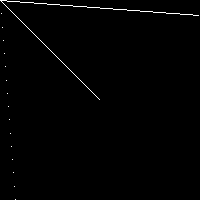

In [4]:
def draw_line2(start, end, frame_buffer):
    x0, y0 = start
    x1, y1 = end
    if(x0 > x1):
        return draw_line2(end, start, frame_buffer)
    if(x1 == x0):
        frame_buffer.draw_point(start)
        return
    t = 0
    dt = 1.0 / (x1 - x0)
    while(t < 1):
        x = x0 + (x1 - x0) * t
        y = y0 + (y1 - y0) * t
        frame_buffer.draw_point((x, y))
        t += dt

fb.fill((0, 0, 0))
draw_line2((0, 0), (100, 100), fb)
draw_line2((0, 0), (199, 15), fb)
draw_line2((0, 0), (15, 199), fb)
fb.display()

- 这样对长线段无法很好表示的问题得到了改善
- 又产生了新的问题，因为我们对于长度的考虑只是对应x，当线段斜率很大的时候，我们又不能很好的表示了

# 改进#2
看起点和终点x方向和y方向上的差值哪个比较大，用大的来作为我们取多少点的依据。

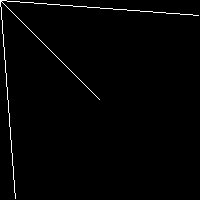

In [5]:
def draw_line3(start, end, frame_buffer):
    x0, y0 = start
    x1, y1 = end
    if(x0 > x1):
        return draw_line3(end, start, frame_buffer)
    if(x1 == x0):
        frame_buffer.draw_point(start)
        return
    t = 0
    cnt = max(abs(x1 - x0), abs(y1 - y0))
    dt = 1.0 / cnt
    while(t < 1):
        x = x0 + (x1 - x0) * t
        y = y0 + (y1 - y0) * t
        frame_buffer.draw_point((x, y))
        t += dt

fb.fill((0, 0, 0))
draw_line3((0, 0), (100, 100), fb)
draw_line3((0, 0), (199, 15), fb)
draw_line3((0, 0), (15, 199), fb)
fb.display()

- ok!我们得到了看起来还不错的效果
- 但是到这里就结束了吗？并没有，我们还有优化的空间

# 改进#3
注意到我们在循环里每次计算采样点x，y的位置的时候，其实是长的边增加一，短的边增加斜率那么多，我们可以在循环里每次把长的边增加一个单位，短的边增加相应的斜率来更新我们的采样点。

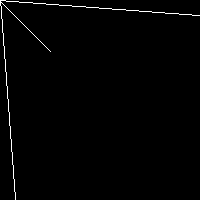

In [6]:
def draw_line(start, end, frame_buffer, reverse=False):
    x0, y0 = start
    x1, y1 = end
    if(x0 > x1):
        return draw_line(end, start, frame_buffer, reverse)
    if(x1 == x0):
        frame_buffer.draw_point(start)
        return
    if abs(x1 - x0) < abs(y1 - y0):
        return draw_line((y0, x0), (y1, x1), frame_buffer, True)
    dt = (y1 - y0) / (x1 - x0)
    if reverse:
        for i in range(round(x0), round(x1) + 1):
            y0 += dt
            frame_buffer.draw_point((y0, i))
    else:
        for i in range(round(x0), round(x1) + 1):
            y0 += dt
            frame_buffer.draw_point((i, y0))
    
fb.fill((0, 0, 0))    
draw_line((0, 0), (50, 50), fb)
draw_line((0, 0), (199, 15), fb)
draw_line((0, 0), (15, 199), fb)
fb.display()

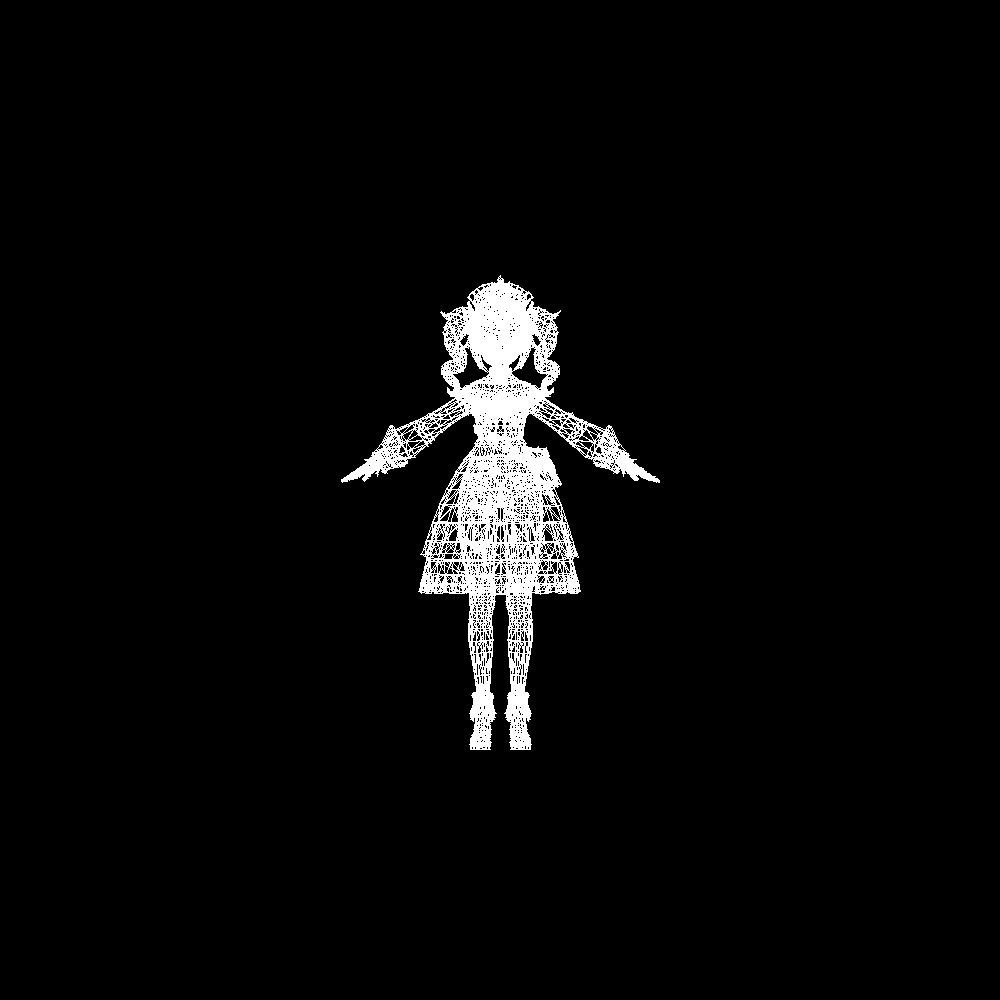

In [9]:
import model
fb = buffer.FrameBuffer(1000, 1000)
a = model.Model("./obj/babala/babala.obj")
fb.clear()
scala = a.scala
for i in a.face:
    v = a.get_vertex(i)
    for j in range(3):
        x0, y0 = (v[j][0] / scala + 1) * fb.width / 2.0, (-v[j][1] / scala - 0.5)  * fb.height / 2.0,
        x1, y1 = (v[(j + 1) % 3][0] / scala + 1) * fb.width / 2.0, (-v[(j + 1) % 3][1] / scala - 0.5)  * fb.height / 2.0,
        draw_line((x0, y0), (x1, y1), fb)
fb.display()